In [76]:
# Problem Statements - You are the data scientist at a telecom company "Neo" whose customers are churning out to its competitors.
#  You have to analyse the data of your company and find insight and stop your customers from churning out to other telecom companies.
# Here I have followed all the data science life cycle, data preprocessing, data manipulation and data visulization then Created machine learning model
#  like linear regression, logistics regression(single and multiple variable), decision tree and random forest

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [7]:
customer_churn = pd.read_csv("customer_churn.csv")

In [10]:
# Extract the fifth column and store it in 'customer_5'
customer_5 = customer_churn.iloc[:, 4]

In [18]:
# Extract all the male senior citizens whose payment method is electronic check and store the result in 'senior_male_electronic'
senior_male_electronic = customer_churn[(customer_churn["gender"] == 'Male') & (customer_churn["SeniorCitizen"] == 1) & (customer_churn["PaymentMethod"] == "Electronic check")]
# senior_male_electronic.head()

In [23]:
# Extract all those customer whose tenure is greater than 70 months or their monthly charges is more than 100$  ans store result in 'customer_total_tenture'
customer_total_tenture = customer_churn[(customer_churn["tenure"] > 70) | (customer_churn["MonthlyCharges"] > 100)]
customer_total_tenture.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [26]:
# Extract all the customer whose contract is of 2 years, payment method is mailed check, churn value is 'yes', and store the result in 'two_mail_yes'
two_mail_yes = customer_churn[(customer_churn["Contract"] == "Two year") & (customer_churn["PaymentMethod"] == "Mailed check") & (customer_churn["Churn"] == "Yes")]
# two_mail_yes.head()

In [31]:
# Extract 333 random records from the customer churn and store in 'customer_333'
customer_333 = customer_churn.sample(n = 333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4951,5117-IFGPS,Male,1,Yes,No,29,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.30,2357.75,No
5149,3970-XGJDU,Female,0,No,No,62,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.20,1123.65,No
3273,7112-OPOTK,Male,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,68.25,2171.15,Yes
2358,6974-DAFLI,Female,0,Yes,No,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,19.70,1140.05,No
2364,4559-UWIHT,Male,0,Yes,No,14,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.65,1185,No


In [29]:
# Get the count of different levels  from the 'churn column'
customer_churn["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, 'Distribution of internet service')

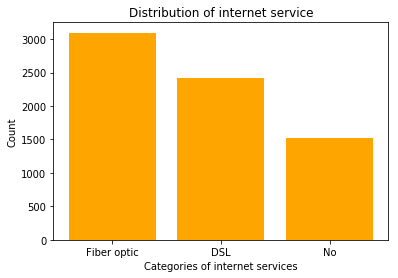

In [34]:
# Build a bar plot for the 'InternetService' column:
# 1. Set x-axis label to 'Categories of internet services'
# 2. Set y-axis to 'count of categories'
# 3. set title of plot to be "Distribution of internet Service"
# 4. Set the color of the bars to be 'Orange'
plt.bar(customer_churn["InternetService"].value_counts().keys().tolist(), customer_churn["InternetService"].value_counts().tolist(), color="orange")
plt.xlabel("Categories of internet services")
plt.ylabel("Count")
plt.title("Distribution of internet service")

Text(0.5, 1.0, 'Distribution of tenure')

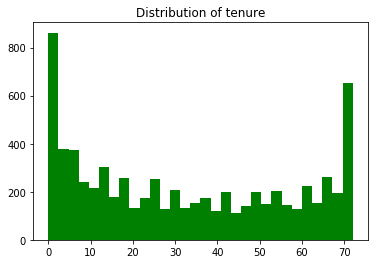

In [35]:
plt.hist(customer_churn['tenure'], bins=30, color="green")
plt.title("Distribution of tenure")

Text(0.5, 1.0, 'Monthly Charges vs Tenure')

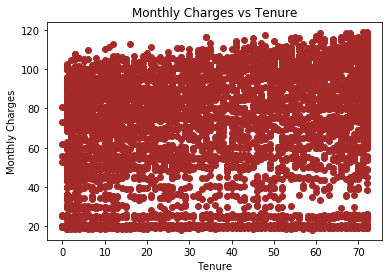

In [37]:
# Build scatter plot between 'MonthlyCharges' and "Tenure". MonthlyCharges in Y-axis and Tenure in X-axis
plt.scatter(x=customer_churn['tenure'], y = customer_churn["MonthlyCharges"], color="brown")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("Monthly Charges vs Tenure")

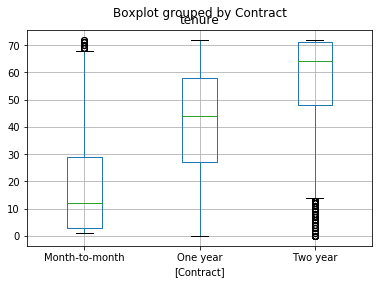

In [38]:
# This was the data preprocessing. How to visulize the data and get some interesting facts
customer_churn.boxplot(column=["tenure"], by=["Contract"])

In [45]:
# Machine learning----Linear Regression
# Build the simple linear model where dependent variable is "MonthlyCharges " and Indenpendent variable is "tenure"
# 1. Divide dataset into train and test set in 70:30 ratio
# 2. Build the model on train set and predict the values on test set
# 3. After predicting the values find the root mean square error
# 4. Find the root mean square error
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# train_test_split -  divide the model into train and test 
y = customer_churn[["MonthlyCharges"]]
x = customer_churn[["tenure"]]
# x.head(), y.head()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
# x_train - all feature present in training set
# y_train - all dependent feature present in " "
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4930, 1), (4930, 1), (2113, 1), (2113, 1))

In [46]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
y_pred[:5], y_test[:5]


(array([[60.95089608],
        [72.98096699],
        [59.1903979 ],
        [55.66940154],
        [71.51388517]]),       MonthlyCharges
 2200           58.20
 4627          116.60
 3225           71.95
 2828           20.45
 3768           77.75)

In [47]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

29.394584027273893

In [60]:
# Logistic Regression
# dependent vaiable "churn" and independent variable "MonthlyCharges"
# Divide dataset in 65:35
# Build the model in train set and predict the values on test set
# Build the confusion matrix ad the accuracy
x = customer_churn[["MonthlyCharges"]]
y = customer_churn[["Churn"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
y_pred = log_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)
# accuracy = 1815 / (1815+651) 73% accuracy

(array([[1815,    0],
        [ 651,    0]], dtype=int64), 0.7360097323600974)

In [63]:
# Build multiple logistics regression
#  dependent variable = "Churn" and Indenpendent variable = tenure and monthly_charges
# Divide the dataset into 80:20 ratio
x = customer_churn[["MonthlyCharges", "tenure"]]
y = customer_churn[["Churn"]]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)
# accuracy = (935+157) /(935+157+211+106) (1815+651) 77% accuracy

C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([[935, 106],
        [211, 157]], dtype=int64), 0.7750177430801988)

In [67]:
# Decision Tree
# Build decision tree model dependent variable = "churn" and indenpendent variable is "tenure"
x = customer_churn[["tenure"]]
y = customer_churn[["Churn"]]
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)
my_tree = DecisionTreeClassifier()
my_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
y_pred = my_tree.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred), accuracy_score(y_test, y_pred)

(array([[965,  76],
        [281,  87]], dtype=int64), 0.7466288147622427)

In [71]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\saurabh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
y_pred = rf.predict(x_test)
confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7466288147622427